In [75]:
import pandas as pd

In [76]:
data=pd.read_csv('/content/cpi Group data.csv')

In [77]:
data.head()

,BaseYear,Year,Month,State,Sector,Group,SubGroup,Index,Inflation (%)
0,2012,2025,March,All India,Combined,General,*,192.0,3.34
1,2012,2025,March,All India,Combined,Food and Beverages,Cereals and Products,200.2,5.93
2,2012,2025,March,All India,Combined,Food and Beverages,Meat and Fish,221.7,0.32
3,2012,2025,March,All India,Combined,Food and Beverages,Egg,187.2,-3.16
4,2012,2025,March,All India,Combined,Food and Beverages,Milk and Products,188.0,2.56


In [78]:
data.tail()

,BaseYear,Year,Month,State,Sector,Group,SubGroup,Index,Inflation (%)
307024,2012,2013,January,West Bengal,Urban,Miscellaneous,Transport and Communication,106.3,*
307025,2012,2013,January,West Bengal,Urban,Miscellaneous,Recreation and Amusement,100.8,*
307026,2012,2013,January,West Bengal,Urban,Miscellaneous,Education,105.1,*
307027,2012,2013,January,West Bengal,Urban,Miscellaneous,Personal Care and Effects,104.6,*
307028,2012,2013,January,West Bengal,Urban,Miscellaneous,*,104.8,*


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307029 entries, 0 to 307028
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   BaseYear       307029 non-null  int64 
 1   Year           307029 non-null  int64 
 2   Month          307029 non-null  object
 3   State          307029 non-null  object
 4   Sector         307029 non-null  object
 5   Group          307029 non-null  object
 6   SubGroup       307029 non-null  object
 7   Index          307029 non-null  object
 8   Inflation (%)  307029 non-null  object
dtypes: int64(2), object(7)
memory usage: 21.1+ MB


In [80]:
data['Year'].value_counts()

,count
Year,
2024,25884
2022,25884
2023,25884
2021,25884
2019,25884
2014,25884
2018,25884
2017,25884
2016,25884


In [81]:
data['Year'].unique()

array([2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015,
       2014, 2013])

In [82]:
data['Sector'].unique()

array(['Combined', 'Rural', 'Urban'], dtype=object)

In [83]:
data['Group'].unique()

array(['General', 'Food and Beverages', 'Pan, Tobacco and Intoxicants',
       'Clothing and Footwear', 'Housing', 'Fuel and Light',
       'Miscellaneous', 'Consumer Food Price'], dtype=object)

In [84]:
data['State'].unique()

array(['All India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal'],
      dtype=object)

In [85]:
data['State'].nunique()

37

In [86]:
data['SubGroup'].unique()

array(['*', 'Cereals and Products', 'Meat and Fish', 'Egg',
       'Milk and Products', 'Oils and Fats', 'Fruits', 'Vegetables',
       'Pulses and Products', 'Sugar and Confectionery', 'Spices',
       'Prepared Meals, Snacks, Sweets etc.', 'Non-alcoholic Beverages',
       'Clothing', 'Footwear', 'Household Goods and Services', 'Health',
       'Transport and Communication', 'Recreation and Amusement',
       'Education', 'Personal Care and Effects'], dtype=object)

In [87]:
data['Index'].nunique()

2203

In [88]:
data['Inflation (%)'].unique()

array(['3.34', '5.93', '0.32', ..., '41.43', '-32.61', '30.39'],
      dtype=object)

In [89]:
data.isnull().sum()

,0
BaseYear,0
Year,0
Month,0
State,0
Sector,0
Group,0
SubGroup,0
Index,0
Inflation (%),0


In [90]:
data['Inflation (%)'] = pd.to_numeric(data['Inflation (%)'], errors='coerce')

In [91]:
data_clean = data.dropna(subset=['Inflation (%)'])

In [92]:
yearly_avg_inflation = data_clean.groupby('Year')['Inflation (%)'].mean()

In [93]:
print(yearly_avg_inflation)

Year
2014    6.681429
2015    5.292825
2016    5.713235
2017    3.522247
2018    3.651658
2019    3.688202
2020    7.104485
2021    6.667948
2022    6.448036
2023    5.472412
2024    4.611405
2025    3.773317
Name: Inflation (%), dtype: float64


In [94]:
import matplotlib.pyplot as plt

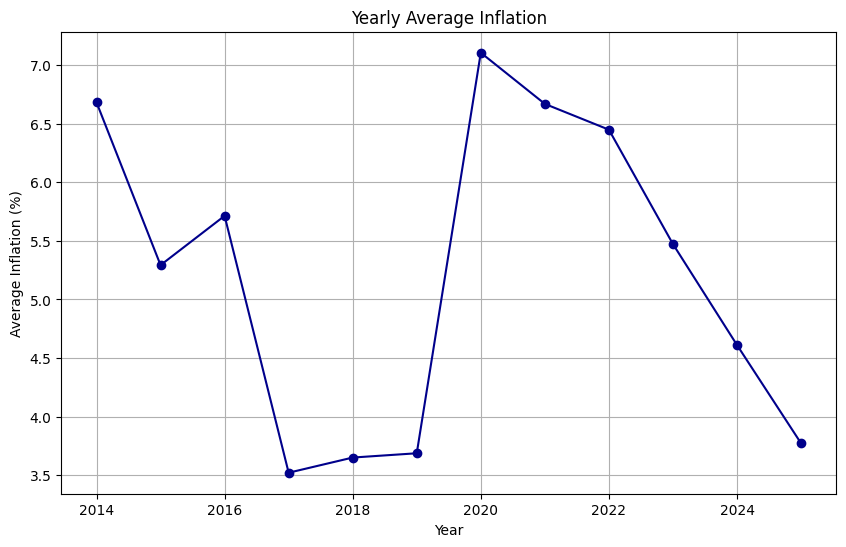

In [95]:
yearly_avg_inflation.plot(kind='line', figsize=(10, 6),color='darkblue',marker='o')
plt.title('Yearly Average Inflation')
plt.xlabel('Year')
plt.ylabel('Average Inflation (%)')
plt.grid(True)
plt.show()

In [96]:
state_wise_avg_inflation = data_clean.groupby('State')['Inflation (%)'].mean()
print(state_wise_avg_inflation)

State
All India                      5.229861
Andaman and Nicobar Islands    5.751397
Andhra Pradesh                 5.398539
Arunachal Pradesh              5.977858
Assam                          5.043496
Bihar                          5.079078
Chandigarh                     4.727581
Chhattisgarh                   4.818959
Dadra and Nagar Haveli         5.342026
Daman and Diu                  5.475474
Delhi                          4.520190
Goa                            4.704839
Gujarat                        5.151277
Haryana                        5.222871
Himachal Pradesh               4.773368
Jammu and Kashmir              5.676077
Jharkhand                      4.898412
Karnataka                      5.383893
Kerala                         5.621864
Lakshadweep                    6.277750
Madhya Pradesh                 5.227997
Maharashtra                    5.112174
Manipur                        6.319772
Meghalaya                      4.983300
Mizoram                        5.1

<ipython-input-97-1aebf2b30dc3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.values, y=state_avg.index, palette="coolwarm")


Text(0.5, 1.0, 'Average Inflation by State')

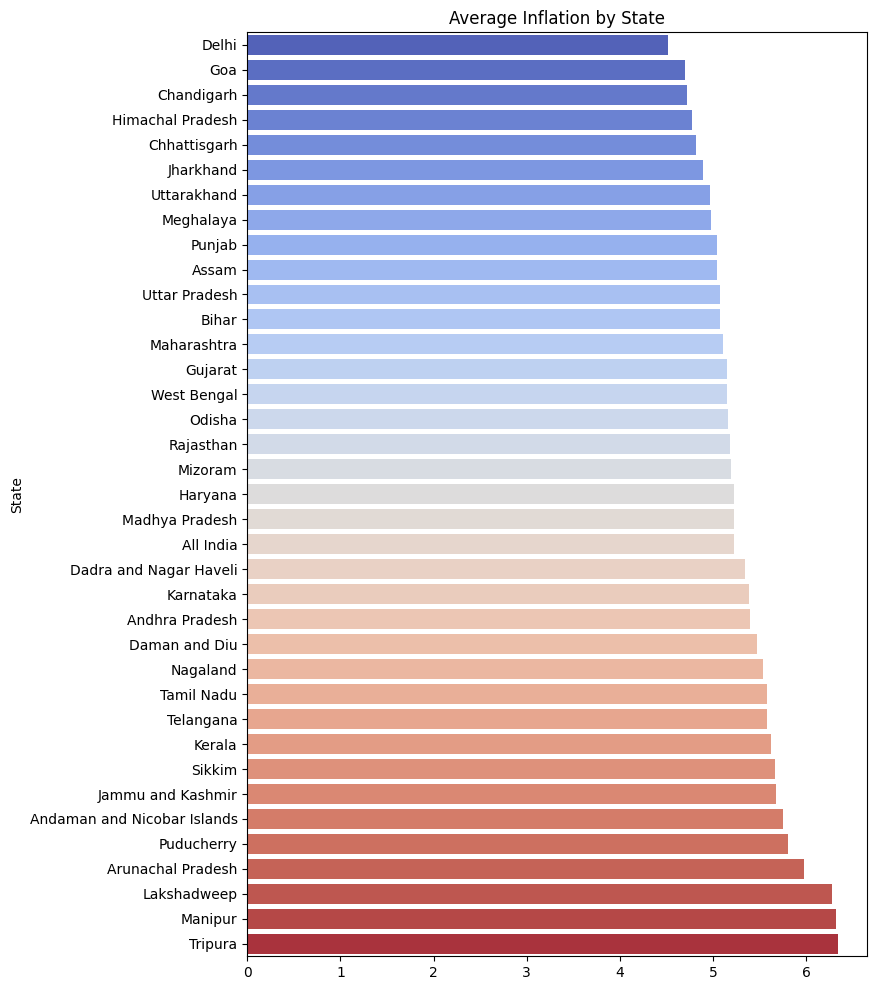

In [97]:
import seaborn as sns

state_avg = data_clean.groupby('State')['Inflation (%)'].mean().sort_values()
plt.figure(figsize=(8,12))
sns.barplot(x=state_avg.values, y=state_avg.index, palette="coolwarm")
plt.title('Average Inflation by State')

In [98]:
sectors_max_inflation = data_clean.groupby('Sector')['Inflation (%)'].max()
print(sectors_max_inflation)

Sector
Combined    120.40
Rural        99.35
Urban       132.81
Name: Inflation (%), dtype: float64


<Axes: title={'center': 'Urban vs Rural Inflation Over Years'}, xlabel='Year'>

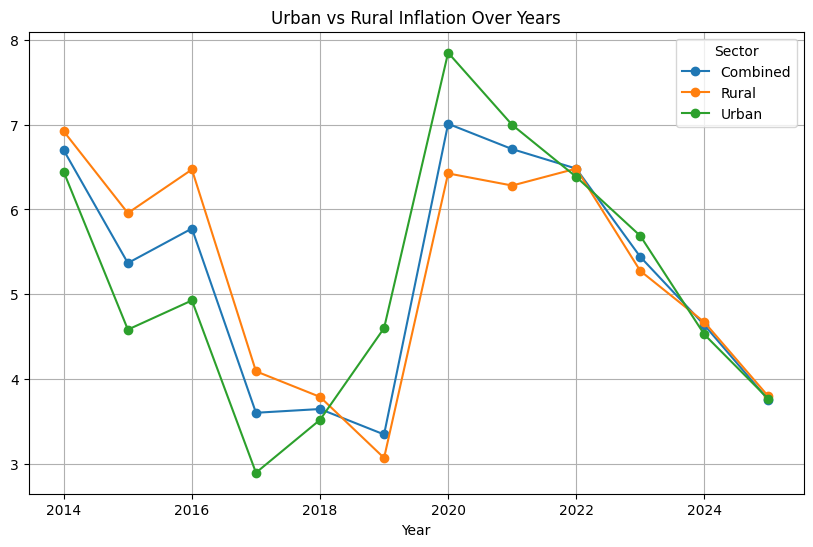

In [112]:
sector_trend = data_clean.groupby(['Year', 'Sector'])['Inflation (%)'].mean().unstack()
sector_trend.plot(marker='o', figsize=(10,6), title='Urban vs Rural Inflation Over Years',grid=True)

In [99]:
subgroups_max_inflation = data_clean.groupby('SubGroup')['Inflation (%)'].max()
print(subgroups_max_inflation)

SubGroup
*                                      132.81
Cereals and Products                    28.48
Clothing                                19.57
Education                               47.89
Egg                                     42.19
Footwear                                23.45
Fruits                                  47.61
Health                                  22.00
Household Goods and Services            25.23
Meat and Fish                           52.87
Milk and Products                       24.14
Non-alcoholic Beverages                 26.32
Oils and Fats                           92.25
Personal Care and Effects               34.98
Prepared Meals, Snacks, Sweets etc.     22.09
Pulses and Products                     90.12
Recreation and Amusement                33.69
Spices                                  43.24
Sugar and Confectionery                 48.59
Transport and Communication             39.03
Vegetables                              93.19
Name: Inflation (%), dtyp

In [100]:
subgroups_avg_inflation = data_clean.groupby('SubGroup')['Inflation (%)'].mean()
print(subgroups_avg_inflation.idxmax() , subgroups_avg_inflation.max())

Spices 6.962827696162168


In [101]:
subgroups_avg_inflation['Education']

np.float64(5.290701514633869)

In [102]:
subgroups_max_inflation['Education']

np.float64(47.89)

In [103]:
health_data = data_clean[data_clean['SubGroup'] == 'Health']
avg_health_inflation_by_year = health_data.groupby('Year')['Inflation (%)'].mean()

In [104]:
print(avg_health_inflation_by_year)

Year
2014    5.392621
2015    5.073466
2016    4.790966
2017    3.866425
2018    6.240302
2019    6.940966
2020    5.137866
2021    7.623889
2022    6.234722
2023    6.121908
2024    4.436461
2025    4.307971
Name: Inflation (%), dtype: float64


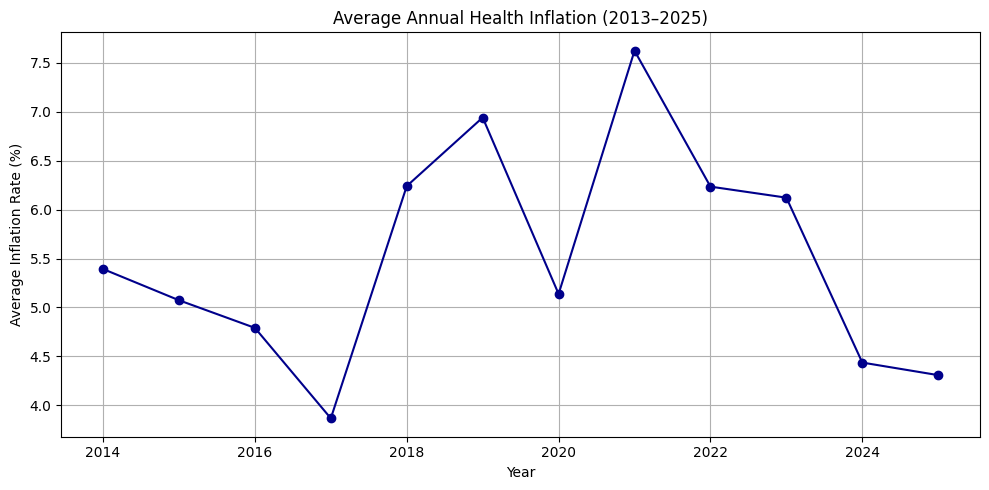

In [105]:
plt.figure(figsize=(10, 5))
avg_health_inflation_by_year.plot(marker='o', color='darkblue')
plt.title('Average Annual Health Inflation (2013–2025)')
plt.xlabel('Year')
plt.ylabel('Average Inflation Rate (%)')
plt.grid(True)
plt.tight_layout()

In [106]:
data_clean['SubGroup'] = data_clean['SubGroup'].replace('*', 'Other')

<ipython-input-106-0dbac4d86b59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['SubGroup'] = data_clean['SubGroup'].replace('*', 'Other')


In [107]:
subgroup_std = data_clean.groupby('SubGroup')['Inflation (%)'].std().sort_values(ascending=False)
print(subgroup_std.head(10))  # Most volatile SubGroups

SubGroup
Vegetables                 17.765502
Pulses and Products        15.287108
Oils and Fats              12.791274
Sugar and Confectionery     8.786653
Spices                      8.058166
Fruits                      6.870539
Egg                         6.514024
Other                       5.488735
Meat and Fish               5.203730
Cereals and Products        4.910406
Name: Inflation (%), dtype: float64


<Axes: title={'center': 'Average Inflation by Month'}, xlabel='Month'>

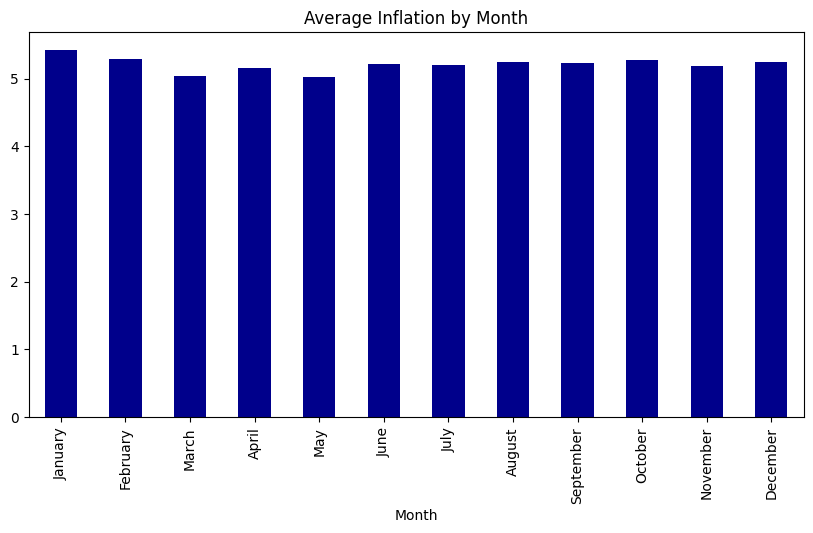

In [108]:
month_avg = data_clean.groupby('Month')['Inflation (%)'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])

month_avg.plot(kind='bar', color='darkblue', figsize=(10,5), title='Average Inflation by Month')

<Axes: xlabel='SubGroup', ylabel='SubGroup'>

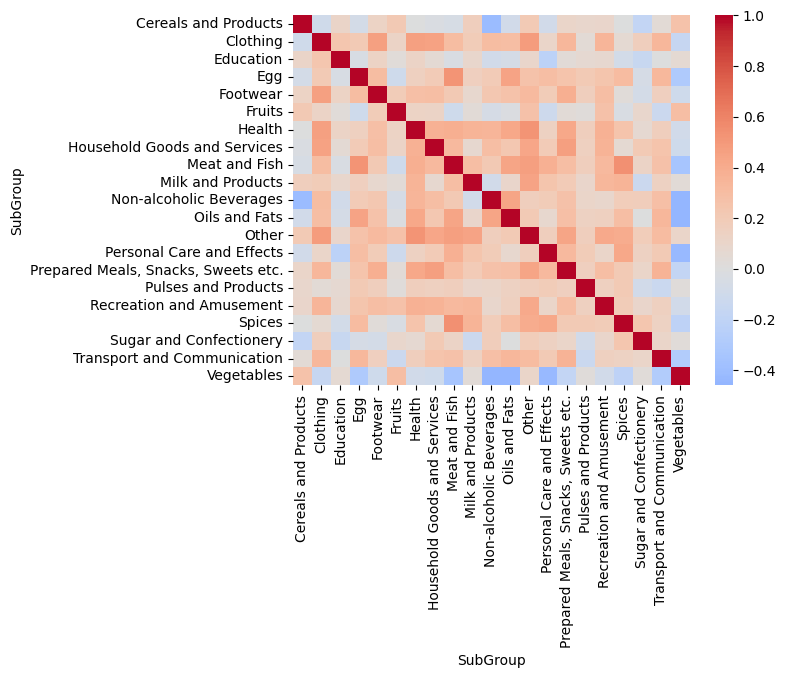

In [109]:
pivot = data_clean[data_clean['Year'] == 2020].pivot_table(
    index=['State', 'Month', 'Sector'], columns='SubGroup', values='Inflation (%)')
sns.heatmap(pivot.corr(), cmap='coolwarm', center=0)